In [2]:
from fit_model import *

In [3]:
# caro aquiiiiiiiiiiiiiiiiii -----------------------------------------
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-VF-80000.txt', 'dataset/english-spanish-train-VF-80000.txt','dataset/english-spanish-test-VF-80000.txt'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

In [4]:
eng_tokenizer = create_tokenizer(dataset[:,0] )
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:,0])
print(f"eng_length:  {eng_length}") # eng_length:  47

eng_length:  47


In [5]:
eng_tokenizer_2 = create_tokenizer(dataset[:,0] )
eng_vocab_size_2 = len(eng_tokenizer_2.word_index) + 1
eng_length_2 = max_length(dataset[:,0])
print(f"eng_length:  {eng_length_2}") # eng_length:  47

eng_length:  47


In [6]:
eng_tokenizer == eng_tokenizer_2

False

In [15]:
print(eng_tokenizer.word_index == eng_tokenizer_2.word_index)

True


In [13]:
print(eng_tokenizer_2.word_index)

{'the': 1, 'i': 2, 'to': 3, 'you': 4, 'tom': 5, 'a': 6, 'is': 7, 'he': 8, 'in': 9, 'of': 10, 'that': 11, 'it': 12, 'was': 13, 'do': 14, 'have': 15, 'me': 16, 'this': 17, 'my': 18, 'for': 19, 'she': 20, 'are': 21, 'what': 22, 'his': 23, 'mary': 24, 'your': 25, 'we': 26, 'on': 27, 'want': 28, 'with': 29, 'be': 30, 'not': 31, 'and': 32, 'like': 33, 'know': 34, 'at': 35, 'him': 36, 'go': 37, 'can': 38, 'her': 39, 'has': 40, 'will': 41, 'time': 42, 'there': 43, 'they': 44, 'did': 45, 'how': 46, 'as': 47, 'very': 48, 'all': 49, 'had': 50, 'about': 51, 'here': 52, 'think': 53, 'up': 54, 'from': 55, 'out': 56, 'get': 57, 'when': 58, 'if': 59, 'an': 60, 'no': 61, 'were': 62, 'one': 63, 'going': 64, 'would': 65, 'by': 66, 'why': 67, 'see': 68, 'come': 69, 'good': 70, 'please': 71, 'just': 72, 'who': 73, 'been': 74, 'need': 75, 'so': 76, 'now': 77, 'tell': 78, 'help': 79, 'but': 80, 'more': 81, 'where': 82, 'never': 83, 'am': 84, 'than': 85, 'something': 86, 'too': 87, 'take': 88, 'some': 89, 'go

In [21]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(GRU(n_units,input_shape=(src_timesteps,1)))
    # ES NECESARIO, para que asi pueda devolver la dimesión de 8
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model
    
def define_model_1_var(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(GRU(n_units,input_shape=(src_timesteps,1)))
    model.add(RepeatVector(tar_timesteps)) 
    model.add(TimeDistributed(Dense(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

# Encoder-Decoder
def define_model_4(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    # Encoder
    model.add(GRU(n_units, input_shape=(src_timesteps,1), go_backwards=True ))
    model.add(RepeatVector(tar_timesteps))
    # Decoder
    model.add(GRU(n_units))
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

In [26]:
folderImg_name = "img_caro/cm_model_"
folderModels_name = "models_caro/cm_model_"

ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', \
                                       'dataset/english-spanish-train-10000.txt', \
                                       'dataset/english-spanish-test-10000.txt'
epochs= 40

# Pruebas Modelo 1

In [27]:
history_models_testLoss = list()
history_models_trainLoss = list()

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 32)                3360      
                                                                 
 repeat_vector_14 (RepeatVec  (None, 8, 32)            0         
 tor)                                                            
                                                                 
 time_distributed_17 (TimeDi  (None, 8, 4510)          148830    
 stributed)                                                      
                                                                 
Total params: 152,190
Trainable params: 152,190
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40

Epoch 1: val_loss improved from inf to 3.01612, saving model to models_caro\cm_model_1_1.h5
250/250 - 15s - 


Epoch 39: val_loss improved from 2.89786 to 2.89245, saving model to models_caro\cm_model_1_1.h5
250/250 - 11s - loss: 2.5507 - acc: 0.6411 - val_loss: 2.8924 - val_acc: 0.6417 - 11s/epoch - 44ms/step
Epoch 40/40

Epoch 40: val_loss improved from 2.89245 to 2.88908, saving model to models_caro\cm_model_1_1.h5
250/250 - 12s - loss: 2.5389 - acc: 0.6411 - val_loss: 2.8891 - val_acc: 0.6417 - 12s/epoch - 46ms/step


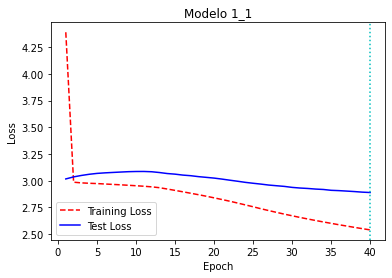

In [28]:
units = 32
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 32
model_save_file_name= folderModels_name +'1_1.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

# preparar codigo para correr esta lineaaaaaaaaaaaaaaaaa ¡¡¡
# plot_model(model, to_file=folderImg_name+'im5test_78445carooo.png', show_shapes=True)

train_evaluate_model_2(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+'1_1.png', 'Modelo 1_1')
history_models_testLoss.append(model.history.history['val_loss'])
history_models_trainLoss.append(model.history.history['loss'])

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 128)               50304     
                                                                 
 repeat_vector_15 (RepeatVec  (None, 8, 128)           0         
 tor)                                                            
                                                                 
 time_distributed_18 (TimeDi  (None, 8, 4510)          581790    
 stributed)                                                      
                                                                 
Total params: 632,094
Trainable params: 632,094
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40

Epoch 1: val_loss improved from inf to 3.31530, saving model to models_caro\cm_model_1_2.h5
125/125 - 15s - 

125/125 - 14s - loss: 2.5398 - acc: 0.6406 - val_loss: 3.0407 - val_acc: 0.6413 - 14s/epoch - 114ms/step


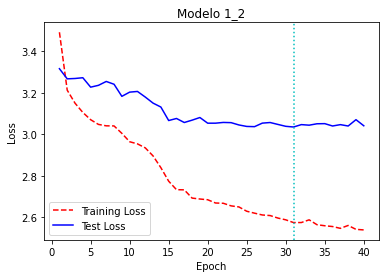

In [29]:
units = 128
learning_rate = 0.05
loss_func='sparse_categorical_crossentropy'
batch_size= 64
model_save_file_name= folderModels_name +'1_2.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

# preparar codigo para correr esta lineaaaaaaaaaaaaaaaaa ¡¡¡
# plot_model(model, to_file=folderImg_name+'im5test_78445carooo.png', show_shapes=True)

train_evaluate_model_2(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+'1_2.png', 'Modelo 1_2')
history_models_testLoss.append(model.history.history['val_loss'])
history_models_trainLoss.append(model.history.history['loss'])

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_16 (GRU)                (None, 512)               791040    
                                                                 
 repeat_vector_16 (RepeatVec  (None, 8, 512)           0         
 tor)                                                            
                                                                 
 time_distributed_19 (TimeDi  (None, 8, 4510)          2313630   
 stributed)                                                      
                                                                 
Total params: 3,104,670
Trainable params: 3,104,670
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40

Epoch 1: val_loss improved from inf to 3.13740, saving model to models_caro\cm_model_1_3.h5
125/125 - 30

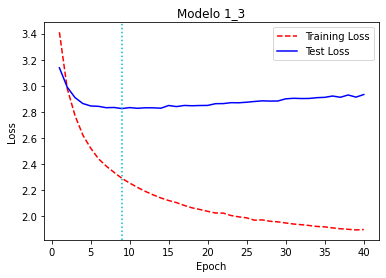

In [30]:
units = 512
learning_rate = 0.01
loss_func='sparse_categorical_crossentropy'
batch_size= 64
model_save_file_name= folderModels_name +'1_3.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

# preparar codigo para correr esta lineaaaaaaaaaaaaaaaaa ¡¡¡
# plot_model(model, to_file=folderImg_name+'im5test_78445carooo.png', show_shapes=True)

train_evaluate_model_2(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+'1_3.png', 'Modelo 1_3')
history_models_testLoss.append(model.history.history['val_loss'])
history_models_trainLoss.append(model.history.history['loss'])

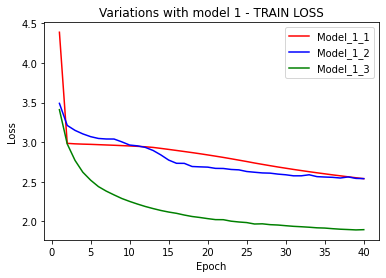

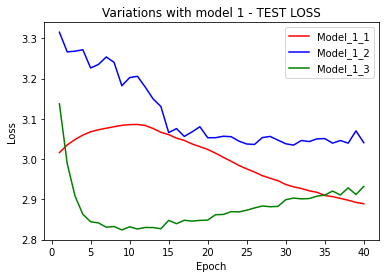

In [31]:
def graph_historyModels(history,title, nameModels, save_image_filename):
    # define axis X , Create count of the number of epochs
    epoch_count = range(1,len(history[0]) + 1 )
        
    plt.plot(epoch_count, history[0], 'r-')
    plt.plot(epoch_count, history[1], 'b-')
    plt.plot(epoch_count, history[2], 'g-')
    plt.legend(nameModels)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Visualize loss history
    plt.savefig(save_image_filename) 
    plt.show() 

vector_names = ['Model_1_1', 'Model_1_2','Model_1_3']

graph_historyModels(history_models_trainLoss,"Variations with model 1 - TRAIN LOSS", \
                             vector_names,  \
                             folderImg_name+"1_variations_trainLoss")

graph_historyModels(history_models_testLoss,"Variations with model 1 - TEST LOSS",  \
                             vector_names,  \
                             folderImg_name+"1_variations_testLoss")

# Pruebas Modelo 1 var

In [32]:
history_models_1var_testLoss = list()
history_models_1var_trainLoss = list()

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_17 (GRU)                (None, 16)                912       
                                                                 
 repeat_vector_17 (RepeatVec  (None, 8, 16)            0         
 tor)                                                            
                                                                 
 time_distributed_20 (TimeDi  (None, 8, 16)            272       
 stributed)                                                      
                                                                 
 dropout_6 (Dropout)         (None, 8, 16)             0         
                                                                 
 time_distributed_21 (TimeDi  (None, 8, 4510)          76670     
 stributed)                                                      

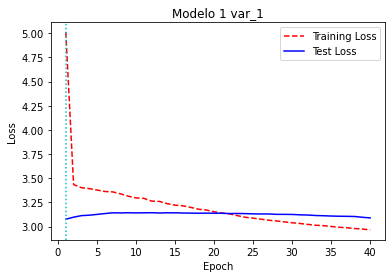

In [33]:
units = 16
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 32
model_save_file_name= folderModels_name +'1_var_1.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1_var(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

# preparar codigo para correr esta lineaaaaaaaaaaaaaaaaa ¡¡¡
# plot_model(model, to_file=folderImg_name+'im5test_78445carooo.png', show_shapes=True)

train_evaluate_model_2(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+'1_var_1.png', 'Modelo 1 var_1')
history_models_1var_testLoss.append(model.history.history['val_loss'])
history_models_1var_trainLoss.append(model.history.history['loss'])

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_18 (GRU)                (None, 64)                12864     
                                                                 
 repeat_vector_18 (RepeatVec  (None, 8, 64)            0         
 tor)                                                            
                                                                 
 time_distributed_22 (TimeDi  (None, 8, 64)            4160      
 stributed)                                                      
                                                                 
 dropout_7 (Dropout)         (None, 8, 64)             0         
                                                                 
 time_distributed_23 (TimeDi  (None, 8, 4510)          293150    
 stributed)                                                      

Epoch 35/40

Epoch 35: val_loss did not improve from 2.88979
125/125 - 11s - loss: 2.6036 - acc: 0.6410 - val_loss: 2.8935 - val_acc: 0.6417 - 11s/epoch - 90ms/step
Epoch 36/40

Epoch 36: val_loss improved from 2.88979 to 2.88857, saving model to models_caro\cm_model_1_var_2.h5
125/125 - 11s - loss: 2.5939 - acc: 0.6410 - val_loss: 2.8886 - val_acc: 0.6417 - 11s/epoch - 90ms/step
Epoch 37/40

Epoch 37: val_loss improved from 2.88857 to 2.87979, saving model to models_caro\cm_model_1_var_2.h5
125/125 - 11s - loss: 2.5859 - acc: 0.6410 - val_loss: 2.8798 - val_acc: 0.6417 - 11s/epoch - 90ms/step
Epoch 38/40

Epoch 38: val_loss did not improve from 2.87979
125/125 - 11s - loss: 2.5798 - acc: 0.6410 - val_loss: 2.8873 - val_acc: 0.6417 - 11s/epoch - 90ms/step
Epoch 39/40

Epoch 39: val_loss did not improve from 2.87979
125/125 - 11s - loss: 2.5727 - acc: 0.6410 - val_loss: 2.8801 - val_acc: 0.6417 - 11s/epoch - 90ms/step
Epoch 40/40

Epoch 40: val_loss did not improve from 2.87979
125/125 

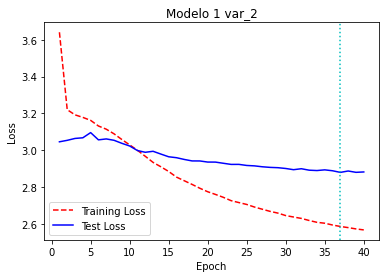

In [34]:
units = 64
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
batch_size= 64
model_save_file_name= folderModels_name +'1_var_2.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1_var(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

# preparar codigo para correr esta lineaaaaaaaaaaaaaaaaa ¡¡¡
# plot_model(model, to_file=folderImg_name+'im5test_78445carooo.png', show_shapes=True)

train_evaluate_model_2(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+'1_var_2.png', 'Modelo 1 var_2')
history_models_1var_testLoss.append(model.history.history['val_loss'])
history_models_1var_trainLoss.append(model.history.history['loss'])

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_19 (GRU)                (None, 256)               198912    
                                                                 
 repeat_vector_19 (RepeatVec  (None, 8, 256)           0         
 tor)                                                            
                                                                 
 time_distributed_24 (TimeDi  (None, 8, 256)           65792     
 stributed)                                                      
                                                                 
 dropout_8 (Dropout)         (None, 8, 256)            0         
                                                                 
 time_distributed_25 (TimeDi  (None, 8, 4510)          1159070   
 stributed)                                                      

Epoch 35/40

Epoch 35: val_loss did not improve from 2.83126
250/250 - 18s - loss: 2.4192 - acc: 0.6407 - val_loss: 2.8462 - val_acc: 0.6417 - 18s/epoch - 70ms/step
Epoch 36/40

Epoch 36: val_loss did not improve from 2.83126
250/250 - 18s - loss: 2.4085 - acc: 0.6407 - val_loss: 2.8524 - val_acc: 0.6417 - 18s/epoch - 70ms/step
Epoch 37/40

Epoch 37: val_loss did not improve from 2.83126
250/250 - 18s - loss: 2.3980 - acc: 0.6405 - val_loss: 2.8482 - val_acc: 0.6417 - 18s/epoch - 70ms/step
Epoch 38/40

Epoch 38: val_loss did not improve from 2.83126
250/250 - 18s - loss: 2.3928 - acc: 0.6404 - val_loss: 2.8560 - val_acc: 0.6417 - 18s/epoch - 71ms/step
Epoch 39/40

Epoch 39: val_loss did not improve from 2.83126
250/250 - 18s - loss: 2.3827 - acc: 0.6407 - val_loss: 2.8618 - val_acc: 0.6417 - 18s/epoch - 70ms/step
Epoch 40/40

Epoch 40: val_loss did not improve from 2.83126
250/250 - 17s - loss: 2.3757 - acc: 0.6405 - val_loss: 2.8611 - val_acc: 0.6417 - 17s/epoch - 70ms/step


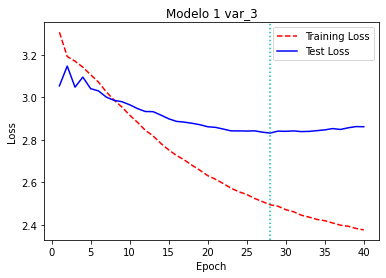

In [35]:
units = 256
learning_rate = 0.003
loss_func='sparse_categorical_crossentropy'
batch_size= 32
model_save_file_name= folderModels_name +'1_var_3.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1_var(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

# preparar codigo para correr esta lineaaaaaaaaaaaaaaaaa ¡¡¡
# plot_model(model, to_file=folderImg_name+'im5test_78445carooo.png', show_shapes=True)

train_evaluate_model_2(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+'1_var_3.png', 'Modelo 1 var_3')
history_models_1var_testLoss.append(model.history.history['val_loss'])
history_models_1var_trainLoss.append(model.history.history['loss'])

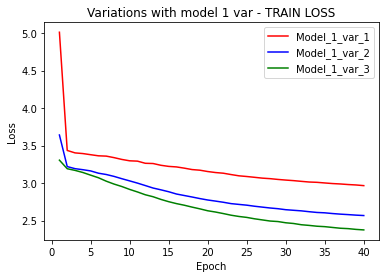

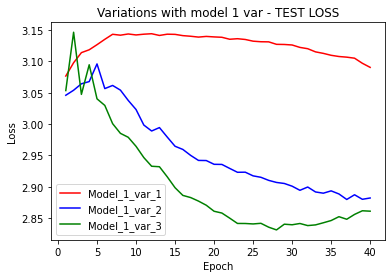

In [36]:
vector_names = ['Model_1_var_1', 'Model_1_var_2','Model_1_var_3']

graph_historyModels(history_models_1var_trainLoss,"Variations with model 1 var - TRAIN LOSS", \
                             vector_names,  \
                             folderImg_name+"1_var_variations_trainLoss")

graph_historyModels(history_models_1var_testLoss,"Variations with model 1 var - TEST LOSS",  \
                             vector_names,  \
                             folderImg_name+"1_var_variations_testLoss")

# Pruebas de Modelo 4

In [37]:
history_models_4_testLoss = list()
history_models_4_trainLoss = list()

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_20 (GRU)                (None, 32)                3360      
                                                                 
 repeat_vector_20 (RepeatVec  (None, 8, 32)            0         
 tor)                                                            
                                                                 
 gru_21 (GRU)                (None, 32)                6336      
                                                                 
 repeat_vector_21 (RepeatVec  (None, 8, 32)            0         
 tor)                                                            
                                                                 
 time_distributed_26 (TimeDi  (None, 8, 32)            1056      
 stributed)                                                      

Epoch 40/40

Epoch 40: val_loss did not improve from 3.06014
125/125 - 11s - loss: 2.9402 - acc: 0.6411 - val_loss: 3.1164 - val_acc: 0.6417 - 11s/epoch - 86ms/step


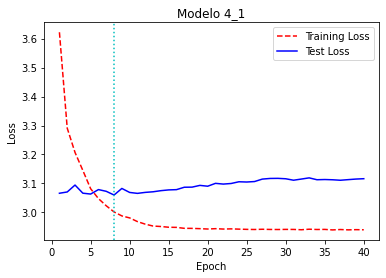

In [38]:
units = 32
learning_rate = 0.02
loss_func='sparse_categorical_crossentropy'
batch_size= 64
model_save_file_name= folderModels_name +'4_1.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_4(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

# preparar codigo para correr esta lineaaaaaaaaaaaaaaaaa ¡¡¡
# plot_model(model, to_file=folderImg_name+'im5test_78445carooo.png', show_shapes=True)

train_evaluate_model_2(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+'4_1.png', 'Modelo 4_1')
history_models_4_testLoss.append(model.history.history['val_loss'])
history_models_4_trainLoss.append(model.history.history['loss'])

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_22 (GRU)                (None, 64)                12864     
                                                                 
 repeat_vector_22 (RepeatVec  (None, 8, 64)            0         
 tor)                                                            
                                                                 
 gru_23 (GRU)                (None, 64)                24960     
                                                                 
 repeat_vector_23 (RepeatVec  (None, 8, 64)            0         
 tor)                                                            
                                                                 
 time_distributed_28 (TimeDi  (None, 8, 64)            4160      
 stributed)                                                      

Epoch 40/40

Epoch 40: val_loss did not improve from 3.05753
125/125 - 11s - loss: 2.9720 - acc: 0.6411 - val_loss: 3.1443 - val_acc: 0.6417 - 11s/epoch - 91ms/step


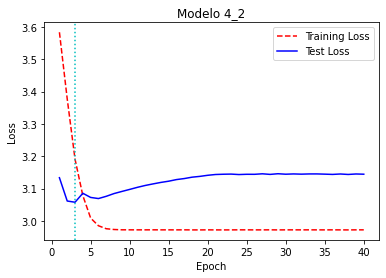

In [39]:
units = 64
learning_rate = 0.03
loss_func='sparse_categorical_crossentropy'
batch_size= 64
model_save_file_name= folderModels_name +'4_2.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_4(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

# preparar codigo para correr esta lineaaaaaaaaaaaaaaaaa ¡¡¡
# plot_model(model, to_file=folderImg_name+'im5test_78445carooo.png', show_shapes=True)

train_evaluate_model_2(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+'4_2.png', 'Modelo 4_2')
history_models_4_testLoss.append(model.history.history['val_loss'])
history_models_4_trainLoss.append(model.history.history['loss'])

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_24 (GRU)                (None, 128)               50304     
                                                                 
 repeat_vector_24 (RepeatVec  (None, 8, 128)           0         
 tor)                                                            
                                                                 
 gru_25 (GRU)                (None, 128)               99072     
                                                                 
 repeat_vector_25 (RepeatVec  (None, 8, 128)           0         
 tor)                                                            
                                                                 
 time_distributed_30 (TimeDi  (None, 8, 128)           16512     
 stributed)                                                      


Epoch 40: val_loss did not improve from 3.07695
250/250 - 15s - loss: 2.9653 - acc: 0.6411 - val_loss: 3.1431 - val_acc: 0.6417 - 15s/epoch - 58ms/step


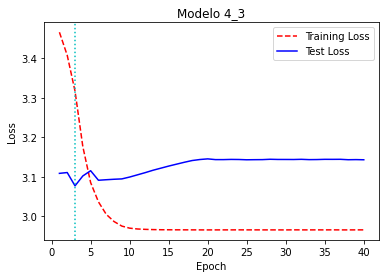

In [40]:
units = 128
learning_rate = 0.01
loss_func='sparse_categorical_crossentropy'
batch_size= 32
model_save_file_name= folderModels_name +'4_3.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_4(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

# preparar codigo para correr esta lineaaaaaaaaaaaaaaaaa ¡¡¡
# plot_model(model, to_file=folderImg_name+'im5test_78445carooo.png', show_shapes=True)

train_evaluate_model_2(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+'4_3.png', 'Modelo 4_3')
history_models_4_testLoss.append(model.history.history['val_loss'])
history_models_4_trainLoss.append(model.history.history['loss'])

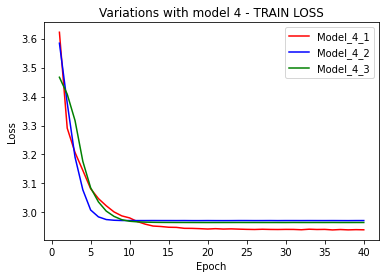

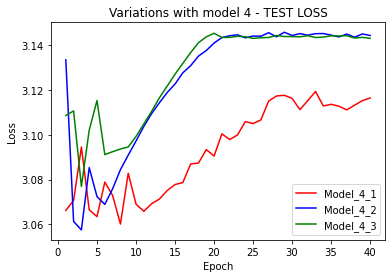

In [41]:
vector_names = ['Model_4_1', 'Model_4_2','Model_4_3']

graph_historyModels(history_models_4_trainLoss,"Variations with model 4 - TRAIN LOSS", \
                             vector_names,  \
                             folderImg_name+"4_variations_trainLoss")

graph_historyModels(history_models_4_testLoss,"Variations with model 4 - TEST LOSS",  \
                             vector_names,  \
                             folderImg_name+"4_variations_testLoss")